In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img=cv2.imread("circuit.jpg")
im=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
im.shape

(220, 229)

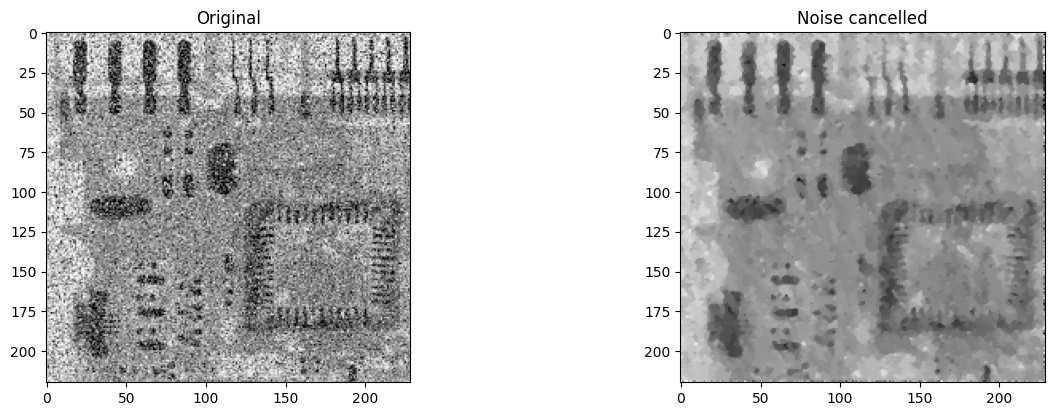

In [3]:
rows=im.shape[0]
cols=im.shape[1]
for i in range(1,rows-1):
    for j in range(1,cols-1):
        temp_array=[im[i][j],im[i-1][j],im[i+1][j],im[i][j-1],im[i][j+1],im[i-1][j-1],im[i-1][j+1],im[i+1][j-1],im[i+1][j+1]]
        temp_array.sort()
        # print(temp_array)
        im[i][j]=temp_array[4]
        temp_array=None

img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Original")
plt.imshow(img)
plt.subplot(2,2,2)
plt.title("Noise cancelled")
plt.imshow(im)

In [4]:
def medianFiltering(im):
    rows=im.shape[0]
    cols=im.shape[1]
    img = np.zeros((rows,cols), dtype='int')
    im = np.pad(im, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            list1=[im[i][j],im[i-1][j],im[i+1][j],im[i][j-1],im[i][j+1],im[i-1][j-1],im[i-1][j+1],im[i+1][j-1],im[i+1][j+1]]
            list1.sort()
            img[i][j]=list1[4]
    return img


In [5]:
median = medianFiltering(img)
plt.imshow(median,cmap='gray')
plt.show()


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (2,2)  and requested shape (3,2)